In [32]:
import numpy as np
import pickle
from matplotlib import pyplot as plt
def plot(file,color="orange",epochs=10):
    with open("results/"+file+"costs.pkl", "rb") as input_file:
        costs = pickle.load(input_file)
    with open("results/"+file+"rews.pkl", "rb") as input_file:
        rewards = pickle.load(input_file)
    assert file[:3] in ["ppo","sac","td3"]

    avr_train = []
    lowerr_train = []
    upperr_train = []
    avc_train = []
    lowerc_train = []
    upperc_train = []
    avr_test = []
    lowerr_test = []
    upperr_test = []
    avc_test = []
    lowerc_test = []
    upperc_test = []
    violations_train = []
    violations_test = []
    n_train = 25
    if file[:3]=="sac" or file[:3]=="td3":
        n_test = 25
        if len(rewards) == 500:
            n_test = 25
        elif len(rewards) == 350:
            n_test = 10
        elif len(rewards) == 510:
            n_test = 26
            
    else:
        n_train = 25
        n_test = 0
    
    for i in range(epochs):
        avr_train.append(np.mean(rewards[(n_train+n_test)*i:(n_train+n_test)*(i+1)-n_test]))
        lowerr_train.append(np.mean(rewards[(n_train+n_test)*i:(n_train+n_test)*(i+1)-n_test])-1.645*
                            np.std(rewards[(n_train+n_test)*i:(n_train+n_test)*(i+1)-n_test])/np.sqrt(n_train))
        upperr_train.append(np.mean(rewards[(n_train+n_test)*i:(n_train+n_test)*(i+1)-n_test])
                            +1.645*np.std(rewards[(n_train+n_test)*i:(n_train+n_test)*(i+1)-n_test])/np.sqrt(n_train))
        avc_train.append(np.mean(costs[(n_train+n_test)*i:(n_train+n_test)*(i+1)-n_test]))
        lowerc_train.append(np.mean(costs[(n_train+n_test)*i:(n_train+n_test)*(i+1)-n_test])
                            -1.645*np.std(costs[(n_train+n_test)*i:(n_train+n_test)*(i+1)-n_test])/np.sqrt(n_train))
        upperc_train.append(np.mean(costs[(n_train+n_test)*i:(n_train+n_test)*(i+1)-n_test])
                            +1.645*np.std(costs[(n_train+n_test)*i:(n_train+n_test)*(i+1)-n_test])/np.sqrt(n_train))
        violations_train.append(np.mean(np.array(costs[(n_train+n_test)*i:(n_train+n_test)*(i+1)-n_test])>25))
        
        
        if file[:3]=="sac" or file[:3]=="td3":
            avr_test.append(np.mean(rewards[(n_train+n_test)*i+n_train:(n_train+n_test)*(i+1)]))
            lowerr_test.append(np.mean(rewards[(n_train+n_test)*i+n_train:(n_train+n_test)*(i+1)])
                               -1.645*np.std(rewards[(n_train+n_test)*i+n_train:(n_train+n_test)*(i+1)])/np.sqrt(n_test))
            upperr_test.append(np.mean(rewards[(n_train+n_test)*i+n_train:(n_train+n_test)*(i+1)])
                               +1.645*np.std(rewards[(n_train+n_test)*i+n_train:(n_train+n_test)*(i+1)])/np.sqrt(n_test))
            avc_test.append(np.mean(costs[(n_train+n_test)*i+n_train:(n_train+n_test)*(i+1)]))
            lowerc_test.append(np.mean(costs[(n_train+n_test)*i+n_train:(n_train+n_test)*(i+1)])
                               -1.645*np.std(costs[(n_train+n_test)*i+n_train:(n_train+n_test)*(i+1)])/np.sqrt(n_test))
            upperc_test.append(np.mean(costs[(n_train+n_test)*i+n_train:(n_train+n_test)*(i+1)])
                               +1.645*np.std(costs[(n_train+n_test)*i+n_train:(n_train+n_test)*(i+1)])/np.sqrt(n_test))

            violations_test.append(np.mean(np.array(costs[(n_train+n_test)*i+n_train:(n_train+n_test)*(i+1)])>25))
            
    x = np.arange(epochs)*1000*n_train
    plt.figure(1)
    plt.ylim((-5,35))
    plt.plot(x,avr_train,color=color)
    plt.fill_between(x,lowerr_train,upperr_train,alpha=1/2,color=color, label='_nolegend_')
    #if file[:3]=="sac" or file[:3]=="td3":
    #    plt.plot(x,avr_test,color=color,alpha=0.75, label='_nolegend_')
    #    plt.fill_between(x,lowerr_test,upperr_test,alpha=0.25,color=color, label='_nolegend_')
    
    plt.figure(2)
    plt.ylim((-1,200))
    plt.plot(x,avc_train,color=color)
    plt.fill_between(x,lowerc_train,upperc_train,alpha=1/2,color=color, label='_nolegend_')
    #if file[:3]=="sac" or file[:3]=="td3":
    #    plt.plot(x,avc_test,color=color,alpha=0.75, label='_nolegend_')
    #    plt.fill_between(x,lowerc_test,upperc_test,alpha=0.25,color=color, label='_nolegend_')
    plt.plot(x,np.zeros(epochs)+25,color="k")
    
    
    plt.figure(3)
    plt.ylim((-0.05,1.05))
    plt.plot(x,violations_train,color=color)
    
    print(np.mean(avr_train[-1:]))
    print(np.mean(avc_train[-1:]))

0.7002689783271785
71.04
0.4785859625181281
62.76
28.17364192491767
52.6
27.4523145730058
46.36


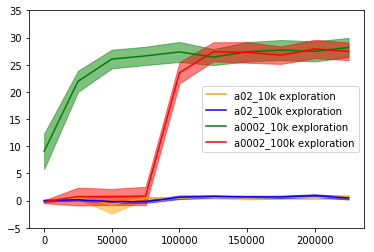

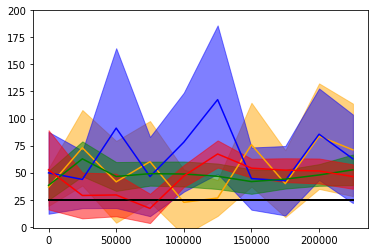

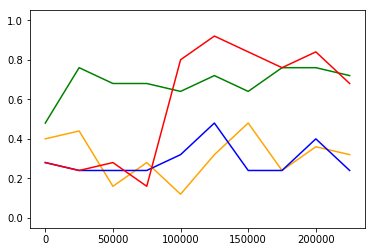

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [33]:
plot("sac_a02_ss10k")
plot("sac_a02_ss100k","blue")
plot("sac_a0002_ss10k","green")
plot("sac_a0002_ss100k","red")

plt.figure(1)
plt.legend(["a02_10k exploration","a02_100k exploration","a0002_10k exploration","a0002_100k exploration"])
plt.show()
plt.figure(2)
plt.show()
plt.figure(3)
plt.show()

#small SAC-alpha is better. Also, fewer exploration steps?

19.06018202724745
59.68
18.694732671260294
53.92
19.436337549056095
50.64
19.01154333605747
50.84


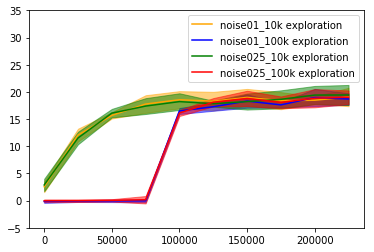

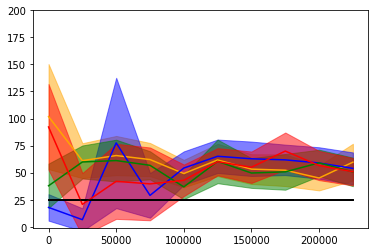

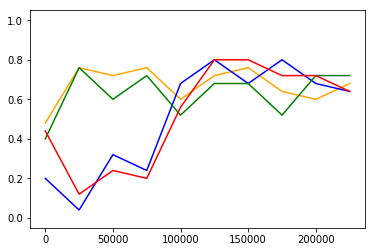

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [34]:
plot("td3_an01_ss10k")
plot("td3_an01_ss100k","blue")
plot("td3_an025_ss10k","green")
plot("td3_an025_ss100k","red")

plt.figure(1)
plt.legend(["noise01_10k exploration","noise01_100k exploration","noise025_10k exploration","noise025_100k exploration"])
plt.show()
plt.figure(2)
plt.show()
plt.figure(3)
plt.show()

#Less exploration steps seems to be better

27.945895535079813
52.56
27.950825562576775
55.4


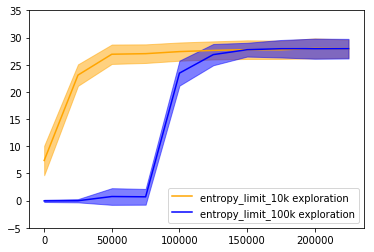

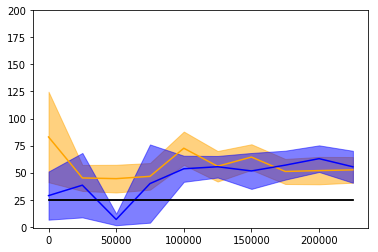

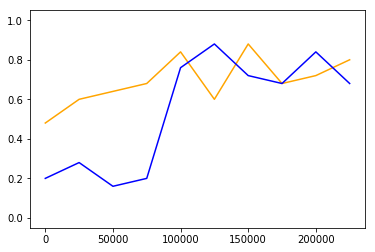

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [35]:
plot("sac_c_ss10k")
plot("sac_c_ss100k","blue")


plt.figure(1)
plt.legend(["entropy_limit_10k exploration","entropy_limit_100k exploration"])
plt.show()
plt.figure(2)
plt.show()
plt.figure(3)
plt.show()
#Performance very similar to good alphas without any tuning. => Robust?!
#Again fewer exploration steps seem to be better. 

34.87530532543697
57.12
0.7659213367085544
27.24
24.738418501745276
170.92


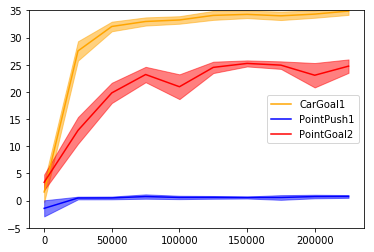

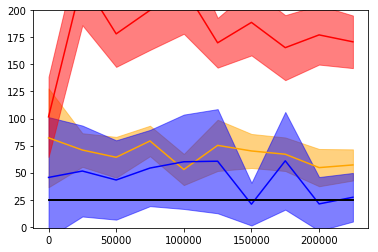

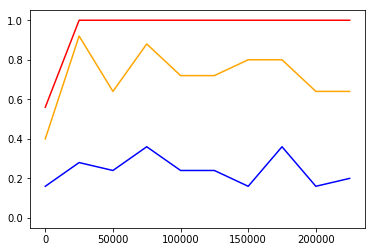

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [36]:
plot("sac_c_ss10k_cargoal")
plot("sac_c_ss10k_pointpush","blue")
plot("sac_c_ss10k_pointgoal2","red")

plt.figure(1)
plt.legend(["CarGoal1","PointPush1","PointGoal2"])
plt.show()
plt.figure(2)
plt.show()
plt.figure(3)
plt.show()
#Performance very similar to good alphas without any tuning. => Robust?!
#Again fewer exploration steps seem to be better. 

12.844824583751834
44.0
14.635156307308348
36.16
7.975508501097538
32.56
4.226092126004631
20.68


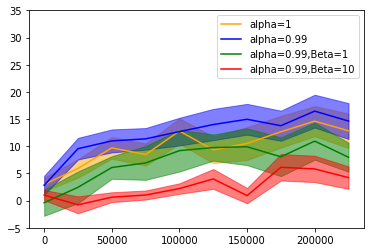

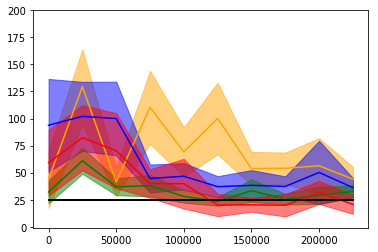

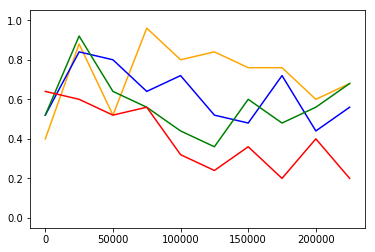

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [37]:
plot("sac_c_ss10k_m0")
plot("sac_c_ss10k_m001","blue")
plot("sac_c_ss10k_m001_a1","green")
plot("sac_c_ss10k_m001_a10","red")

plt.figure(1)
plt.legend(["alpha=1","alpha=0.99","alpha=0.99,Beta=1","alpha=0.99,Beta=10"])
plt.show()
plt.figure(2)
plt.show()
plt.figure(3)
plt.show()
#High beta seem to be worst wrt to reward but better regarding costs

16.24252549833541
105.28
7.141729658062901
40.24
10.88574450683837
18.4
-0.6684318487287044
7.92


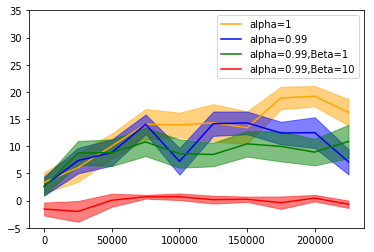

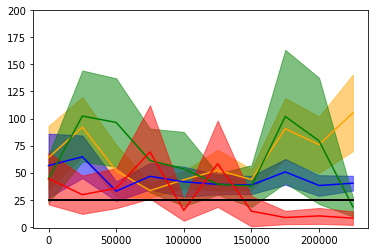

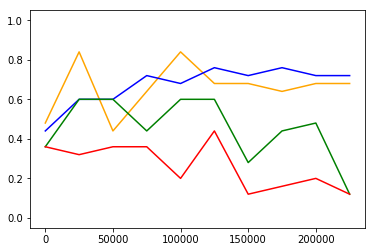

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [38]:
plot("td3_ss10k_m0")
plot("td3_ss10k_m001","blue")
plot("td3_ss10k_m001_a1","green")
plot("td3_ss10k_m001_a10","red")

plt.figure(1)
plt.legend(["alpha=1","alpha=0.99","alpha=0.99,Beta=1","alpha=0.99,Beta=10"])
plt.show()
plt.figure(2)
plt.show()
plt.figure(3)
plt.show()
#Costs very chaotic, rewards not so stable. Beta = 10 without costs, but also no rewards. 

0.8769325046392344
94.48
3.367171758805623
38.72
-0.2814536702496233
18.2
0.9184155882399533
12.12


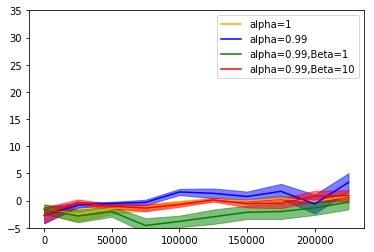

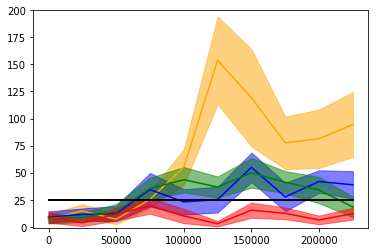

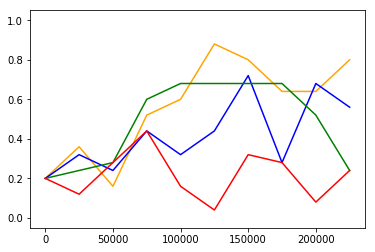

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [39]:
plot("ppo_m0")
plot("ppo_m001","blue")
plot("ppo_m001_a1","green")
plot("ppo_m001_a10","red")

plt.figure(1)
plt.legend(["alpha=1","alpha=0.99","alpha=0.99,Beta=1","alpha=0.99,Beta=10"])
plt.show()
plt.figure(2)
plt.show()
plt.figure(3)
plt.show()
#Costs ok for large beta. But rewards are pretty small all along

7.461387852186733
22.56
4.678855436024196
25.12
-0.6286867373282141
5.0
-0.40830507757551254
75.24


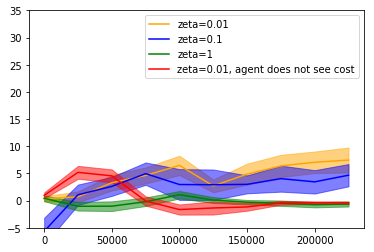

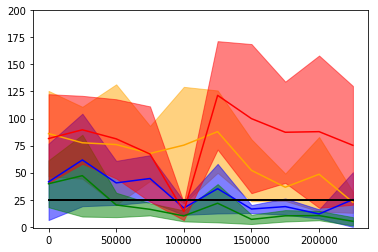

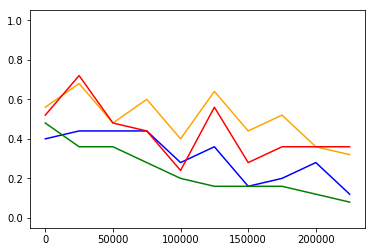

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [40]:
plot("sac_c_ss10k_m001_a1_c001")
plot("sac_c_ss10k_m001_a1_c01","blue")
plot("sac_c_ss10k_m001_a1_c1","green")
plot("sac_c_ss10k_m001_a1_c001_nocostinfo","red")

plt.figure(1)
plt.legend(["zeta=0.01","zeta=0.1","zeta=1","zeta=0.01, agent does not see cost"])
plt.show()
plt.figure(2)
plt.show()
plt.figure(3)
plt.show()
#Agent that does not see cost is bad in terms of both reward and costs. Roughly, larger zeta means less cost and less reward. 

0.042137355110753436
96.96
1.0771723269068358
62.56
-0.030056103639621343
97.0
1.9564290664162025
74.64


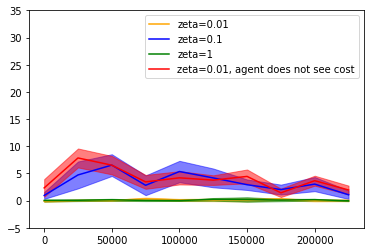

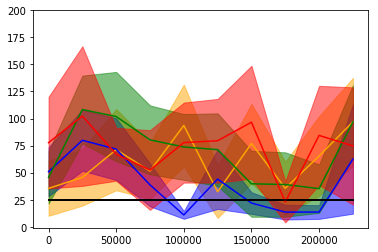

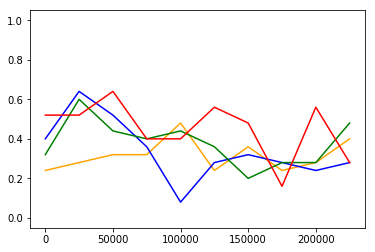

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [41]:
plot("td3_ss10k_m001_a1_c001")
plot("td3_ss10k_m001_a1_c01","blue")
plot("td3_ss10k_m001_a1_c1","green")
plot("td3_ss10k_m001_a1_c001_nocostinfo","red")

plt.figure(1)
plt.legend(["zeta=0.01","zeta=0.1","zeta=1","zeta=0.01, agent does not see cost"])
plt.show()
plt.figure(2)
plt.show()
plt.figure(3)
plt.show()
#Agent not seeing cost and zeta=0.1 perform best in terms of reward. Others are just chaotic. Overall this does not look like stable learning

2.5637302375494886
18.4
0.0011515747272877873
16.64
0.08545455220487447
3.88
4.961112411097046
37.28


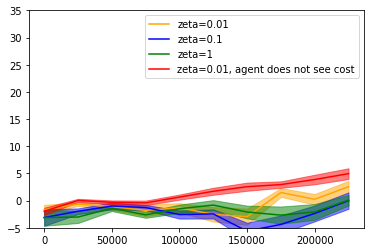

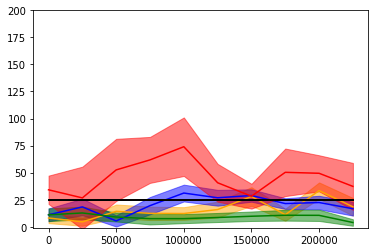

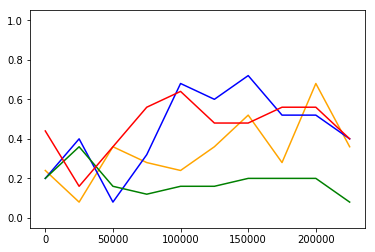

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [42]:
plot("ppo_m001_a1_c001")
plot("ppo_m001_a1_c01","blue")
plot("ppo_m001_a1_c1","green")
plot("ppo_m001_a1_c001_nocostinfo","red")

plt.figure(1)
plt.legend(["zeta=0.01","zeta=0.1","zeta=1","zeta=0.01, agent does not see cost"])
plt.show()
plt.figure(2)
plt.show()
plt.figure(3)
plt.show()
#Agent not seeing cost with best reward but breaking constraints. Others all seem to be rather good at respecting the constraint.
# But they learn to improve the reward very slowly. 

7.461387852186733
22.56
11.247733678517081
24.24
10.530043850470625
39.32
7.015737891762293
28.04


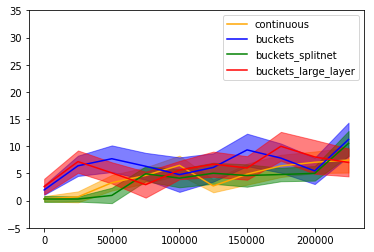

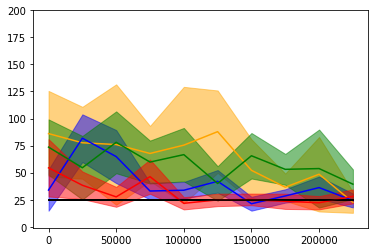

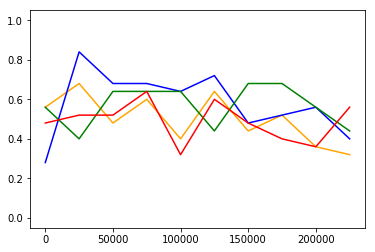

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [43]:
plot("sac_c_ss10k_m001_a1_c001")
plot("sac_c_ss10k_m001_a1_c001_buckets","blue")
plot("sac_c_ss10k_m001_a1_c001_buckets_splitnet","green")
plot("sac_c_ss10k_m001_a1_c001_buckets_first_layer_512","red")


plt.figure(1)
plt.legend(["continuous","buckets","buckets_splitnet","buckets_large_layer"])
plt.show()
plt.figure(2)
plt.show()
plt.figure(3)
plt.show()
#Weak evidence, but: buckets seem to learn to respect cost more quickly and might learn a bit faster initially.

0.042137355110753436
96.96
7.25292699972934
87.56
8.595090027175173
51.84
0.0421395540436351
96.96


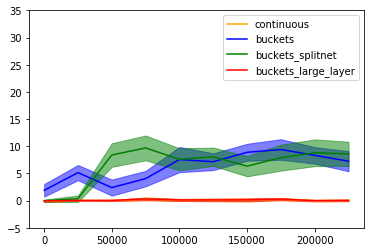

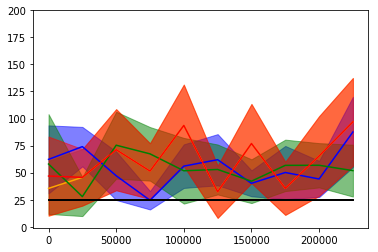

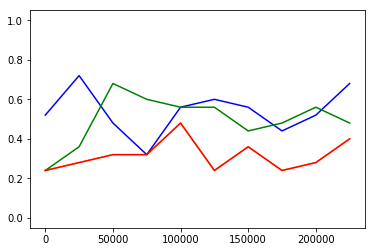

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [44]:
plot("td3_ss10k_m001_a1_c001")
plot("td3_ss10k_m001_a1_c001_buckets","blue")
plot("td3_ss10k_m001_a1_c001_buckets_splitnet","green")
plot("td3_ss10k_m001_a1_c001_buckets_first_layer_512","red")

    
plt.figure(1)
plt.legend(["continuous","buckets","buckets_splitnet","buckets_large_layer"])
plt.show()
plt.figure(2)
plt.show()
plt.figure(3)
plt.show()
#Nothing seems to learn to respect the constraint. Buckets might be better in terms of reward, but this might just be random fluctuation. 

2.5637302375494886
18.4
3.2975834292455186
49.44
0.025425838898624063
35.32
0.6467788876110501
70.76


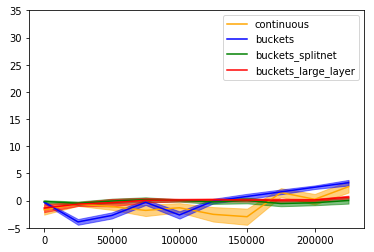

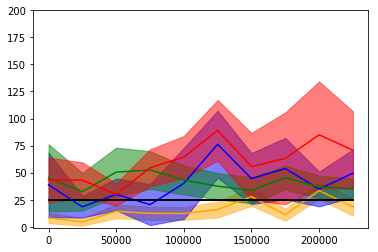

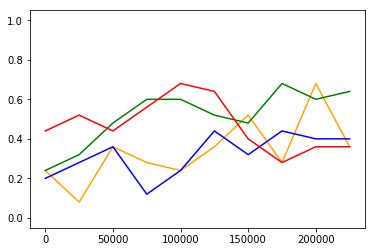

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [45]:
plot("ppo_m001_a1_c001")
plot("ppo_m001_a1_c001_buckets","blue")
plot("ppo_m001_a1_c001_buckets_splitnet","green")
plot("ppo_m001_a1_c001_buckets_first_layer_512","red")


plt.figure(1)
plt.legend(["continuous","buckets","buckets_splitnet","buckets_large_layer"])
plt.show()
plt.figure(2)
plt.show()
plt.figure(3)
plt.show()
#Buckets seems slightly better in terms of reward, continuous might be better in terms of cost (but not super clear...)

7.461387852186733
22.56
-7.523372740628832
31.36
9.755244730069586
41.12
15.839883505635555
34.96


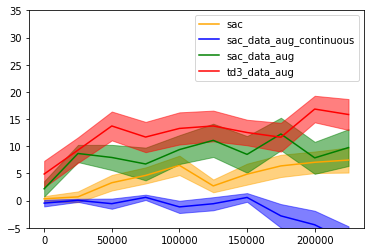

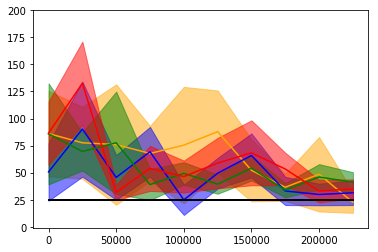

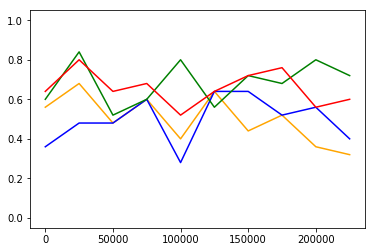

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [46]:
plot("sac_c_ss10k_m001_a1_c001")
plot("sac_c_ss10k_m001_a1_c001_data_aug_nobuckets","blue")
plot("sac_c_ss10k_m001_a1_c001_data_aug","green")
plot("td3_ss10k_m001_a1_c001_data_aug","red")

plt.figure(1)
plt.legend(["sac","sac_data_aug_continuous","sac_data_aug","td3_data_aug"])
plt.show()
plt.figure(2)
plt.show()
plt.figure(3)
plt.show()
#Data augmenations seems to learn a lot quicker intially, but we don't have strong evidence that it manages to reduce the costs...
#

7.461387852186733
22.56
9.755244730069586
41.12
6.28803409247037
16.08
-1.4257243042468324
5.16


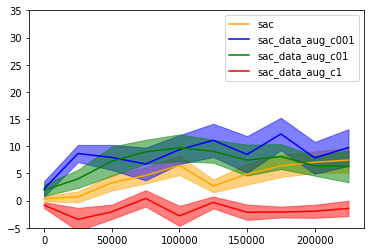

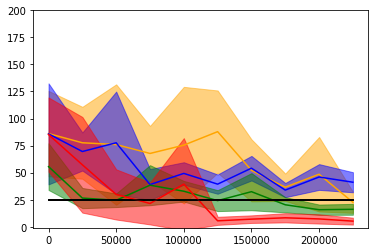

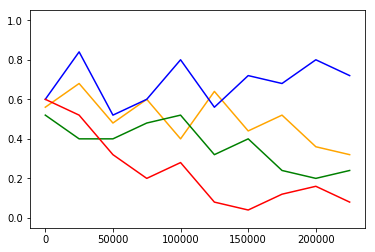

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [47]:
plot("sac_c_ss10k_m001_a1_c001")
plot("sac_c_ss10k_m001_a1_c001_data_aug","blue")
plot("sac_c_ss10k_m001_a1_c01_data_aug","green")
plot("sac_c_ss10k_m001_a1_c1_data_aug","red")

plt.figure(1)
plt.legend(["sac","sac_data_aug_c001","sac_data_aug_c01","sac_data_aug_c1"])
plt.show()
plt.figure(2)
plt.show()
plt.figure(3)
plt.show()

7.461387852186733
22.56
7.365968905944918
11.6
0.5210840002733462
37.0
-1.4257243042468324
5.16


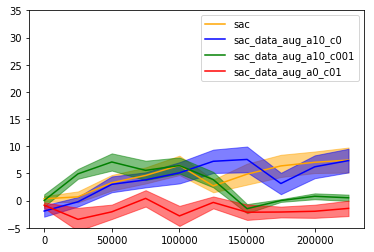

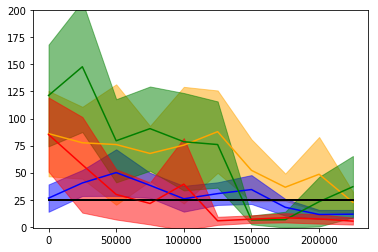

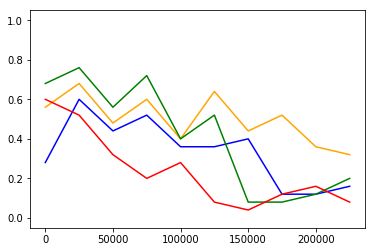

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [48]:
plot("sac_c_ss10k_m001_a1_c001")
plot("sac_c_ss10k_m001_a10_data_aug","blue")
plot( "sac_c_ss10k_m001_a0_c01_data_aug","green")
plot("sac_c_ss10k_m001_a1_c1_data_aug","red")

plt.figure(1)
plt.legend(["sac","sac_data_aug_a10_c0","sac_data_aug_a10_c001","sac_data_aug_a0_c01"])
plt.show()
plt.figure(2)
plt.show()
plt.figure(3)
plt.show()

8.498865499848005
19.08
15.03801649679415
53.52
11.79726105471836
34.04
-0.5620921673886796
8.76
-0.6430564359076146
5.8
9.51174899434528
34.24


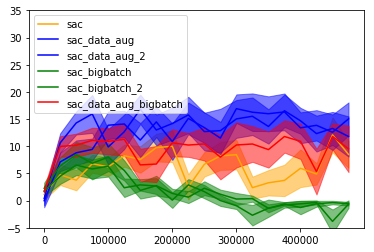

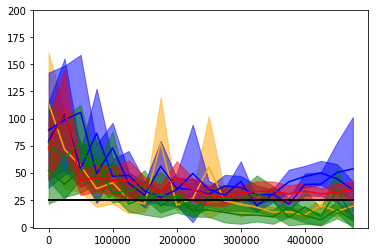

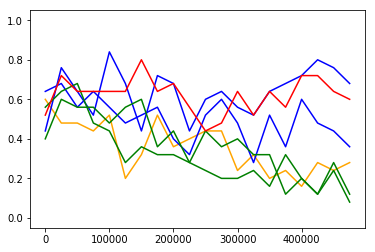

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [49]:
plot("sac_c_ss10k_m001_a1_c001_long",epochs=20)
plot("sac_c_ss10k_m001_a1_c001_long_data_aug","blue",epochs=20)
plot("sac_c_ss10k_m001_a1_c001_long_data_aug2","blue",epochs=20)
plot("sac_c_ss10k_m001_a1_c001_long_bigbatch_correct","green",epochs=20)
plot("sac_c_ss10k_m001_a1_c001_long_data_aug_bigbatch","green",epochs=20)  #This and the next were mixed up with the naming!
plot("sac_c_ss10k_m001_a1_c001_long_data_bigbatch","red",epochs=20)



plt.figure(1)
plt.legend(["sac","sac_data_aug","sac_data_aug_2","sac_bigbatch","sac_bigbatch_2","sac_data_aug_bigbatch"])
plt.show()
plt.figure(2)
plt.show()
plt.figure(3)
plt.show()

8.498865499848005
19.08
15.03801649679415
53.52
11.79726105471836
34.04
10.901323087784242
11.92


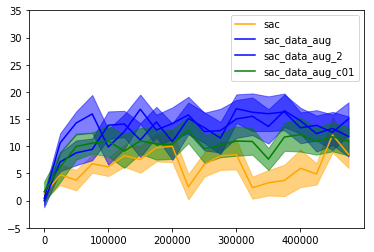

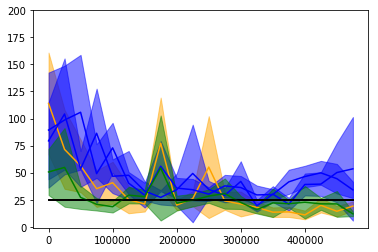

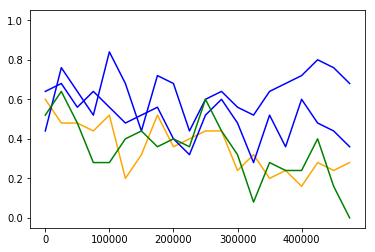

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [50]:
plot("sac_c_ss10k_m001_a1_c001_long",epochs=20)
plot("sac_c_ss10k_m001_a1_c001_long_data_aug","blue",epochs=20)
plot("sac_c_ss10k_m001_a1_c001_long_data_aug2","blue",epochs=20)
plot("sac_c_ss10k_m001_a1_c01_long_data_aug","green",epochs=20) #This and the next were mixed up with the naming!



plt.figure(1)
plt.legend(["sac","sac_data_aug","sac_data_aug_2","sac_data_aug_c01"])
plt.show()
plt.figure(2)
plt.show()
plt.figure(3)
plt.show()

8.498865499848005
19.08
16.568623529300524
67.16
6.505074035029721
44.6


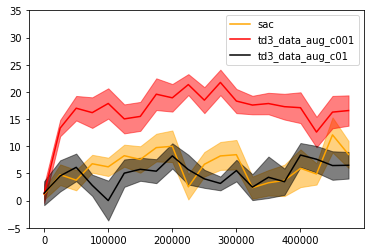

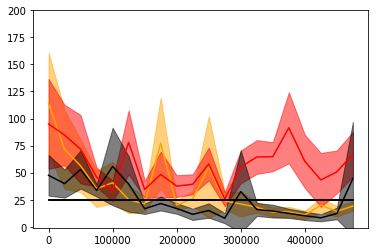

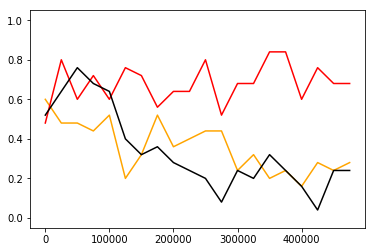

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [51]:
plot("sac_c_ss10k_m001_a1_c001_long",epochs=20)
plot("td3_ss10k_m001_a1_c001_long_data_aug","red",epochs=20)
plot("td3_ss10k_m001_a1_c01_long_data_aug","black",epochs=20)
plt.figure(1)
plt.legend(["sac","td3_data_aug_c001","td3_data_aug_c01"])
plt.show()
plt.figure(2)
plt.show()
plt.figure(3)
plt.show()

15.03801649679415
53.52
16.568623529300524
67.16
nan
nan
9.227762253839895
31.48
-0.4099426051034717
19.68


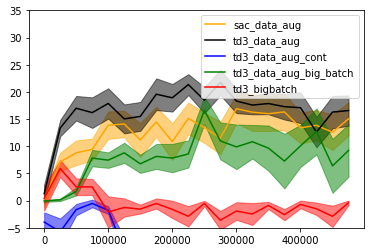

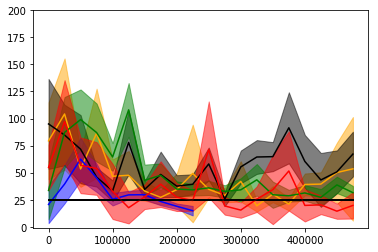

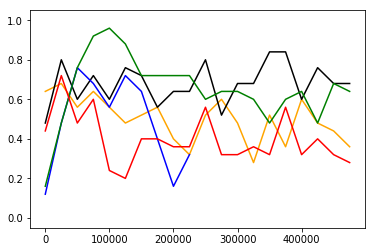

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [52]:
plot("sac_c_ss10k_m001_a1_c001_long_data_aug",epochs=20)
plot("td3_ss10k_m001_a1_c001_long_data_aug","black",epochs=20)
plot("td3_ss10k_m001_a1_c001_data_aug_nobuckets","blue",epochs=20)
plot("td3_ss10k_m001_a1_c001_long_data_aug_bigbatch","green",epochs=20)
plot("td3_ss10k_m001_a1_c001_long_bigbatch","red",epochs=20)

plt.figure(1)
plt.legend(["sac_data_aug","td3_data_aug","td3_data_aug_cont","td3_data_aug_big_batch","td3_bigbatch"])
plt.show()
plt.figure(2)
plt.show()
plt.figure(3)
plt.show()

25.381989760486537
45.96
17.673822141409033
77.48
5.657279887228066
26.52


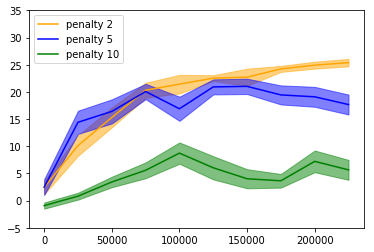

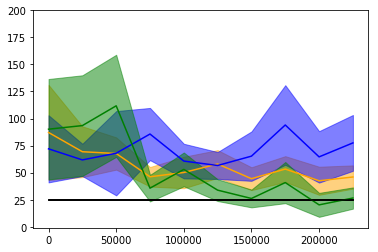

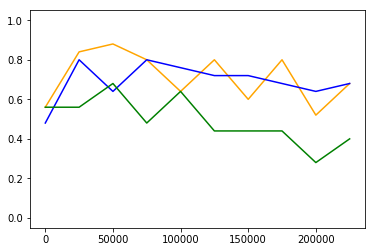

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

5.197189222960423
21.24
1.3594713662800766
4.16
8.498865499848005
19.08


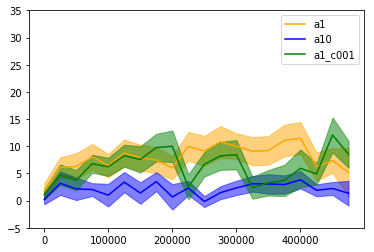

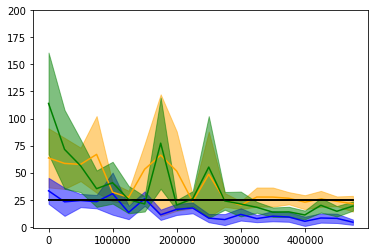

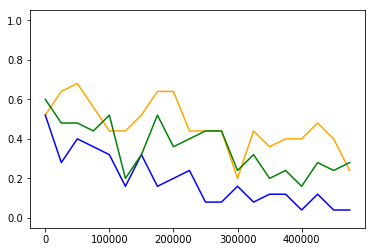

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

8.498865499848005
19.08
0.995992997246214
12.24
1.8911188506839545
1.16


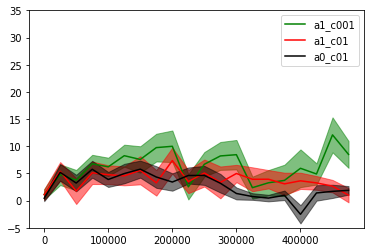

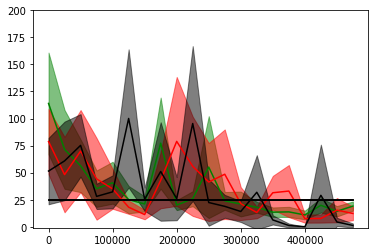

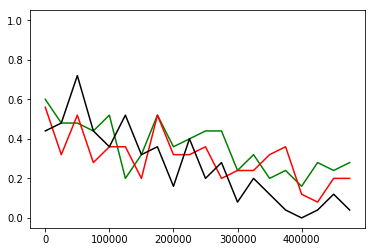

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [53]:
plot("sac_c_ss10k_m1_a2")
plot("sac_c_ss10k_m1_a5","blue")
plot("sac_c_ss10k_m1_a10","green")

plt.figure(1)
plt.legend(["penalty 2","penalty 5","penalty 10"])
plt.show()
plt.figure(2)
plt.show()
plt.figure(3)
plt.show()

plot("sac_c_ss10k_m001_a1_long",epochs=20)
plot("sac_c_ss10k_m001_a10_long","blue",epochs=20)
plot("sac_c_ss10k_m001_a1_c001_long","green",epochs=20)


plt.figure(1)
plt.legend(["a1","a10","a1_c001"])
plt.show()
plt.figure(2)
plt.show()
plt.figure(3)
plt.show()

plot("sac_c_ss10k_m001_a1_c001_long","green",epochs=20)
plot("sac_c_ss10k_m001_a1_c01_long","red",epochs=20)
plot("sac_c_ss10k_m001_a0_c01_long","black",epochs=20)

plt.figure(1)
plt.legend(["a1_c001","a1_c01","a0_c01"])
plt.show()
plt.figure(2)
plt.show()
plt.figure(3)
plt.show()

-0.004881239085251288
15.68
2.780794760852592
6.64
4.680610463765999
38.32


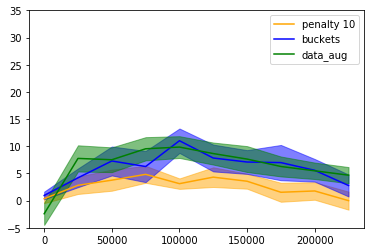

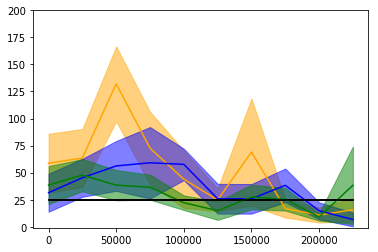

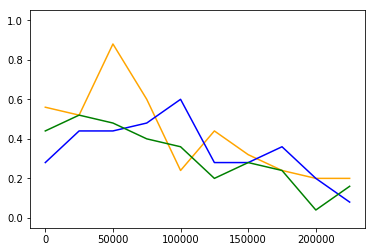

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [54]:
plot("sac_c_ss10k_m1_a10_long")
plot("sac_c_ss10k_m1_a10_buckets_long","blue")
plot("sac_c_ss10k_m1_a10_buckets_data_aug_long","green")

plt.figure(1)
plt.legend(["penalty 10","buckets","data_aug"])
plt.show()
plt.figure(2)
plt.show()
plt.figure(3)
plt.show()

12.772642263783801
24.12
1.9068860509770473
164.96
15.273115421794396
32.76


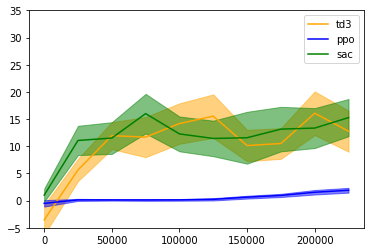

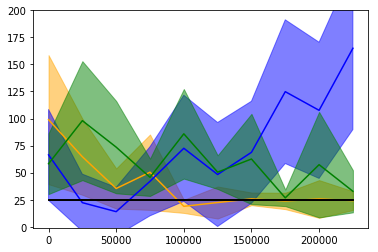

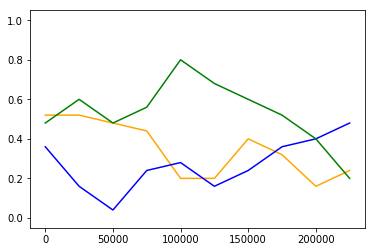

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

32.00030704855074
65.6
31.191531444631014
64.76
13.857032401547752
82.0


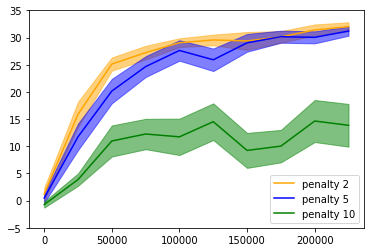

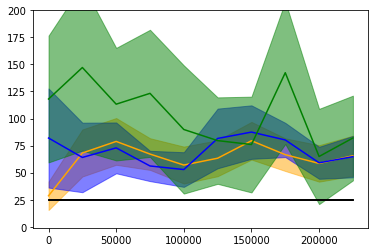

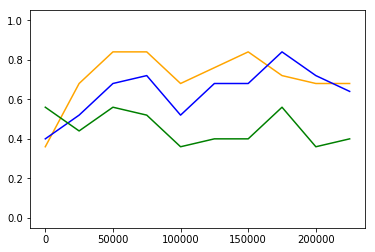

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

15.273115421794396
32.76
10.003008276611482
29.28
-0.30479660443640194
39.36


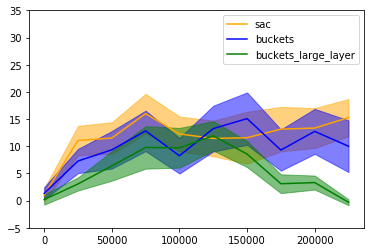

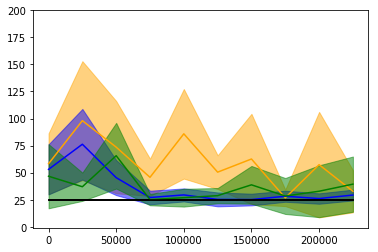

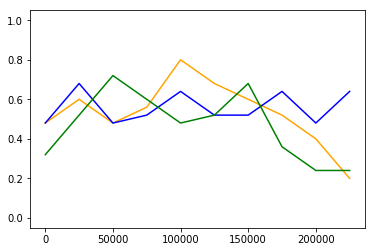

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

16.83681103216452
103.04
5.904205778711364
14.76
15.838510961111048
81.44


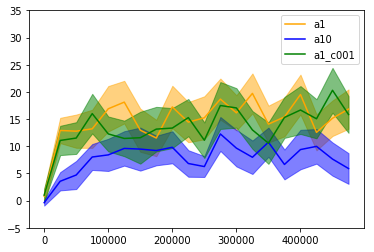

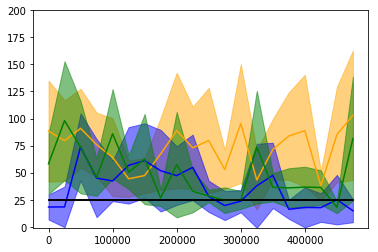

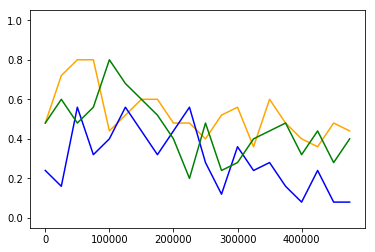

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

15.838510961111048
81.44
12.193824525323514
11.96
11.793995644775903
14.36


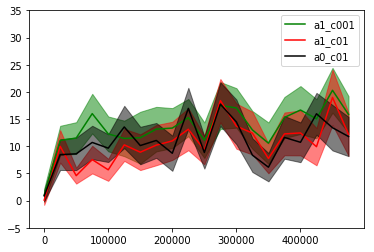

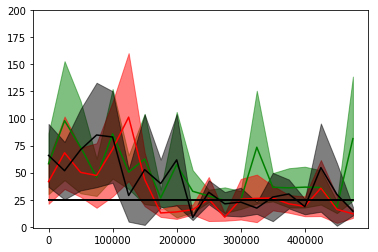

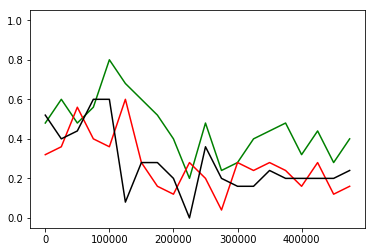

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [55]:
plot("td3_ss10k_m001_a1_c001_cargoal")
plot("ppo_m001_a1_c001_cargoal","blue")
plot("sac_c_ss10k_m001_a1_c001_cargoal","green")

plt.figure(1)
plt.legend(["td3","ppo","sac"])
plt.show()
plt.figure(2)
plt.show()
plt.figure(3)
plt.show()

plot("sac_c_ss10k_m1_a2_cargoal")
plot("sac_c_ss10k_m1_a5_cargoal","blue")
plot("sac_c_ss10k_m1_a10_cargoal","green")

plt.figure(1)
plt.legend(["penalty 2","penalty 5","penalty 10"])
plt.show()
plt.figure(2)
plt.show()
plt.figure(3)
plt.show()


plot("sac_c_ss10k_m001_a1_c001_cargoal")
plot("sac_c_ss10k_m001_a1_c001_buckets_cargoal","blue")
plot("sac_c_ss10k_m001_a1_c001_buckets_first_layer_512_cargoal","green")

plt.figure(1)
plt.legend(["sac","buckets","buckets_large_layer"])
plt.show()
plt.figure(2)
plt.show()
plt.figure(3)
plt.show()




plot("sac_c_ss10k_m001_a1_cargoal",epochs=20)
plot("sac_c_ss10k_m001_a10_cargoal","blue",epochs=20)
plot("sac_c_ss10k_m001_a1_c001_cargoal","green",epochs=20)


plt.figure(1)
plt.legend(["a1","a10","a1_c001"])
plt.show()
plt.figure(2)
plt.show()
plt.figure(3)
plt.show()

plot("sac_c_ss10k_m001_a1_c001_cargoal","green",epochs=20)
plot("sac_c_ss10k_m001_a1_c01_cargoal","red",epochs=20)
plot("sac_c_ss10k_m001_a0_c01_cargoal","black",epochs=20)

plt.figure(1)
plt.legend(["a1_c001","a1_c01","a0_c01"])
plt.show()
plt.figure(2)
plt.show()
plt.figure(3)
plt.show()

10.163330020432966
32.68
-0.16691568274216975
59.88
15.51107116866269
14.12


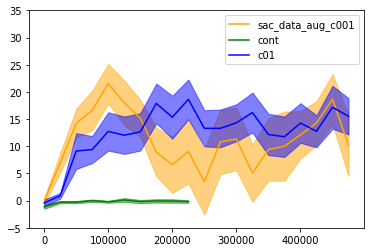

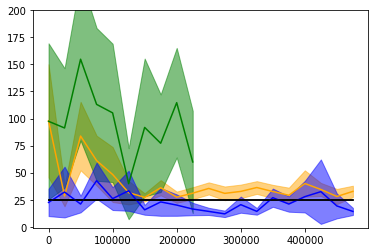

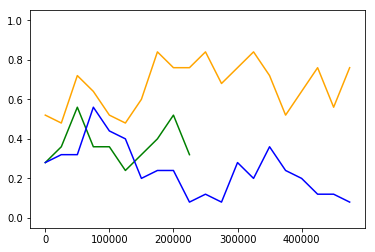

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

10.989446504192404
25.28
-0.13880759796353115
0.0
12.215772392685878
17.44


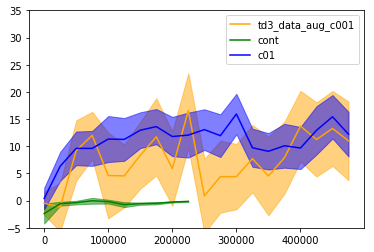

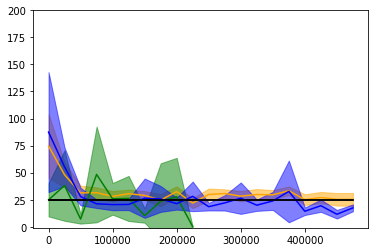

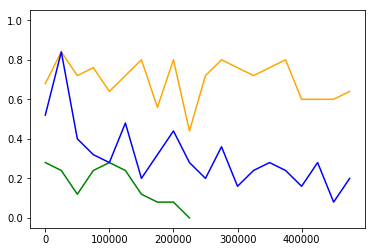

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [56]:
plot("sac_c_ss10k_m001_a1_c001_long_data_aug_cargoal",epochs=20)
plot("sac_c_ss10k_m001_a1_c001_data_aug_cont_cargoal","green",epochs=10)
plot("sac_c_ss10k_m001_a1_c01_long_data_aug_cargoal","blue",epochs=20)


plt.figure(1)
plt.legend(["sac_data_aug_c001","cont","c01"])
plt.show()
plt.figure(2)
plt.show()
plt.figure(3)
plt.show()


plot("td3_ss10k_m001_a1_c001_long_data_aug_cargoal",epochs=20)
plot("td3_ss10k_m001_a1_c001_data_aug_cont_cargoal","green",epochs=10)
plot("td3_ss10k_m001_a1_c01_long_data_aug_cargoal","blue",epochs=20)


plt.figure(1)
plt.legend(["td3_data_aug_c001","cont","c01"])
plt.show()
plt.figure(2)
plt.show()
plt.figure(3)
plt.show()

0.28884250051795357
43.72
0.5382568197809054
13.8
0.07195334546656962
5.68


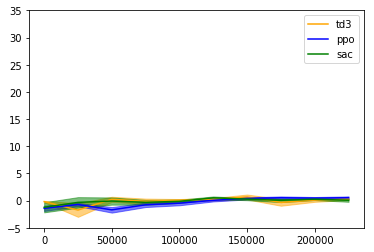

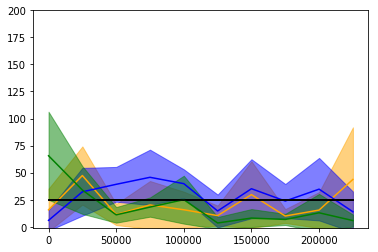

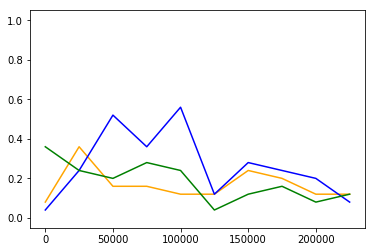

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

0.25719018626739065
23.64
0.4811646815232845
31.0
0.2009123361144459
2.6


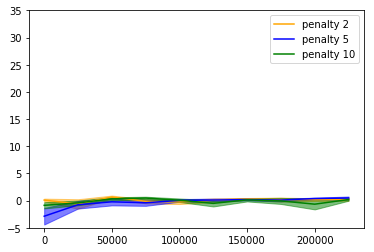

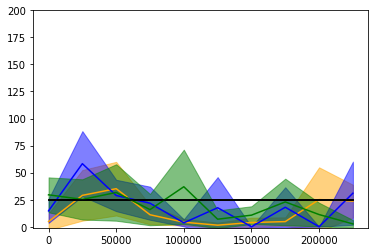

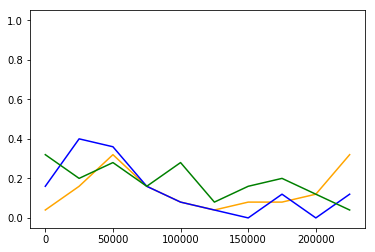

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

0.07195334546656962
5.68
-0.08604451567456013
4.32
-0.9731364195876919
27.68


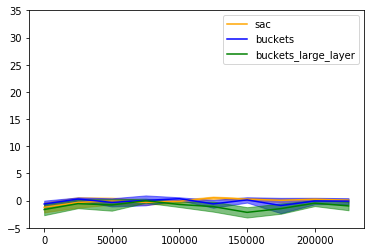

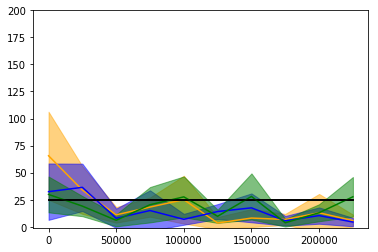

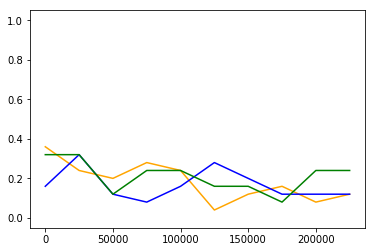

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

-0.026366022065251772
1.36
0.078670306737635
0.0
0.03191792404104854
0.64


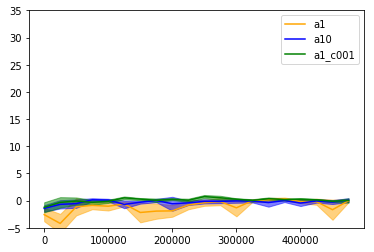

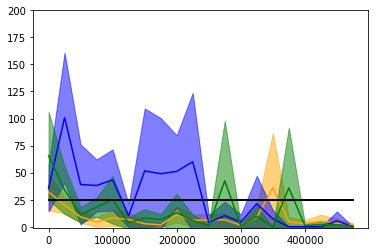

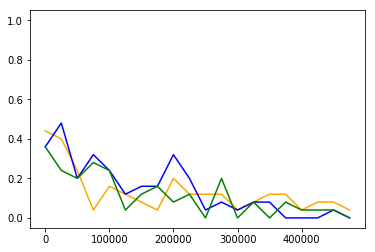

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

0.03191792404104854
0.64
-1.1608531410671319
0.44
0.0037431277268225884
17.2


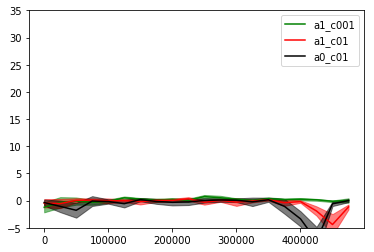

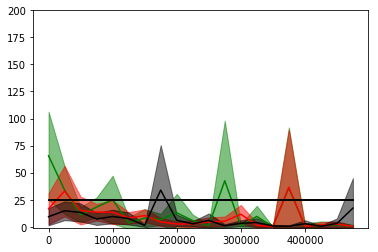

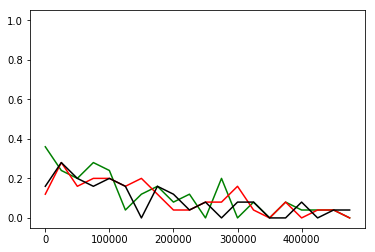

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [57]:
plot("td3_ss10k_m001_a1_c001_pointpush")
plot("ppo_m001_a1_c001_pointpush","blue")
plot("sac_c_ss10k_m001_a1_c001_pointpush","green")

plt.figure(1)
plt.legend(["td3","ppo","sac"])
plt.show()
plt.figure(2)
plt.show()
plt.figure(3)
plt.show()

plot("sac_c_ss10k_m1_a2_pointpush")
plot("sac_c_ss10k_m1_a5_pointpush","blue")
plot("sac_c_ss10k_m1_a10_pointpush","green")

plt.figure(1)
plt.legend(["penalty 2","penalty 5","penalty 10"])
plt.show()
plt.figure(2)
plt.show()
plt.figure(3)
plt.show()


plot("sac_c_ss10k_m001_a1_c001_pointpush")
plot("sac_c_ss10k_m001_a1_c001_buckets_pointpush","blue")
plot("sac_c_ss10k_m001_a1_c001_buckets_first_layer_512_pointpush","green")

plt.figure(1)
plt.legend(["sac","buckets","buckets_large_layer"])
plt.show()
plt.figure(2)
plt.show()
plt.figure(3)
plt.show()




plot("sac_c_ss10k_m001_a1_pointpush",epochs=20)
plot("sac_c_ss10k_m001_a10_pointpush","blue",epochs=20)
plot("sac_c_ss10k_m001_a1_c001_pointpush","green",epochs=20)


plt.figure(1)
plt.legend(["a1","a10","a1_c001"])
plt.show()
plt.figure(2)
plt.show()
plt.figure(3)
plt.show()

plot("sac_c_ss10k_m001_a1_c001_pointpush","green",epochs=20)
plot("sac_c_ss10k_m001_a1_c01_pointpush","red",epochs=20)
plot("sac_c_ss10k_m001_a0_c01_pointpush","black",epochs=20)

plt.figure(1)
plt.legend(["a1_c001","a1_c01","a0_c01"])
plt.show()
plt.figure(2)
plt.show()
plt.figure(3)
plt.show()

0.4408853761115506
3.44
-3.3480614054002866
1.56
-0.2729667439715002
3.76


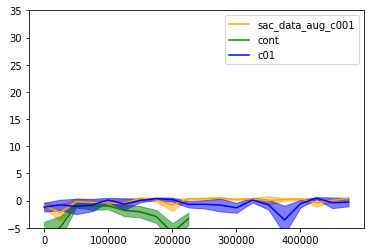

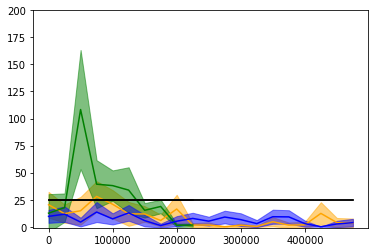

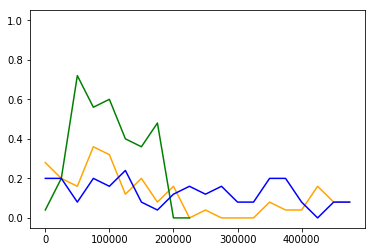

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

0.18567756764757193
2.68
-0.25834919302855885
22.6
0.025077726476088313
3.4


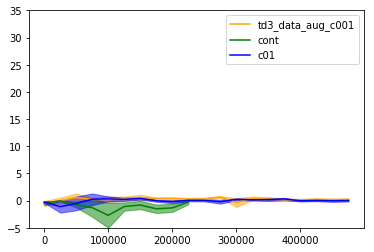

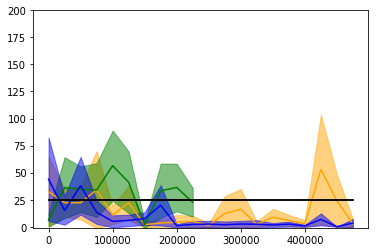

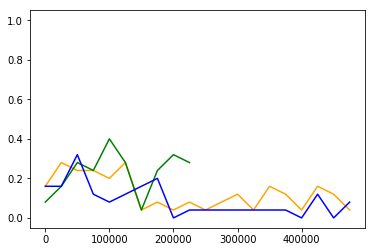

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [58]:
plot("sac_c_ss10k_m001_a1_c001_long_data_aug_pointpush",epochs=20)
plot("sac_c_ss10k_m001_a1_c001_data_aug_cont_pointpush","green",epochs=10)
plot("sac_c_ss10k_m001_a1_c01_long_data_aug_pointpush","blue",epochs=20)


plt.figure(1)
plt.legend(["sac_data_aug_c001","cont","c01"])
plt.show()
plt.figure(2)
plt.show()
plt.figure(3)
plt.show()


plot("td3_ss10k_m001_a1_c001_long_data_aug_pointpush",epochs=20)
plot("td3_ss10k_m001_a1_c001_data_aug_cont_pointpush","green",epochs=10)
plot("td3_ss10k_m001_a1_c01_long_data_aug_pointpush","blue",epochs=20)


plt.figure(1)
plt.legend(["td3_data_aug_c001","cont","c01"])
plt.show()
plt.figure(2)
plt.show()
plt.figure(3)
plt.show()

0.5392158200964097
26.12
1.6697092812707037
126.12
-1.7113556285920426
30.92


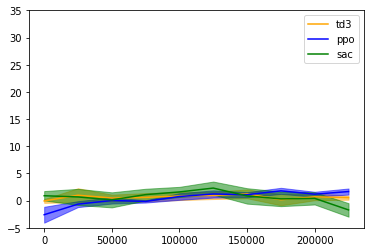

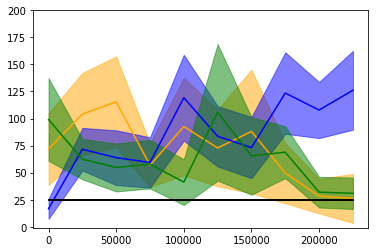

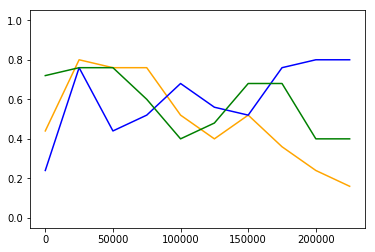

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

20.5612924560646
177.8
2.3826973411875194
29.44
0.1159945699409524
46.36


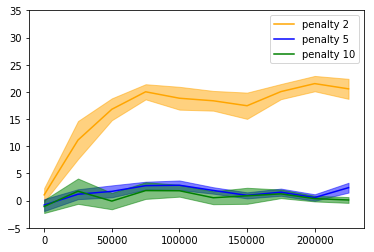

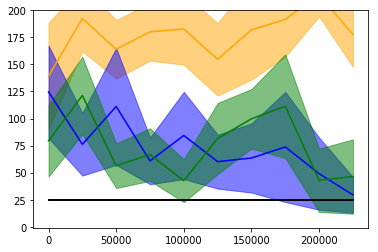

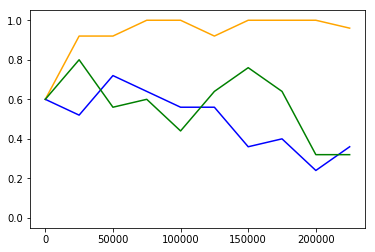

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

-1.7113556285920426
30.92
-2.0118485144055236
30.68
-1.9517442770718159
65.68


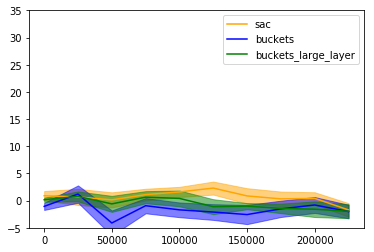

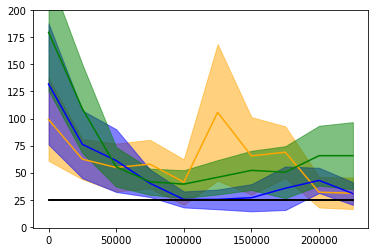

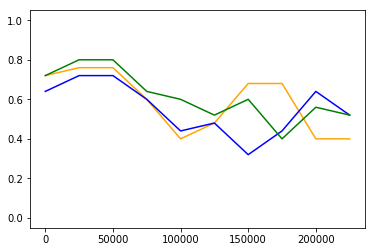

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

2.7616303835017497
86.44
-2.8232146911870877
12.76
0.9883486877088022
29.36


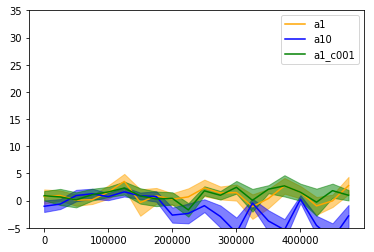

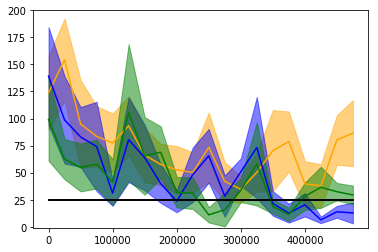

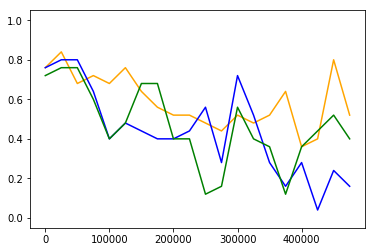

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

0.9883486877088022
29.36
-0.144679982621964
5.32
-0.12800988643361444
94.08


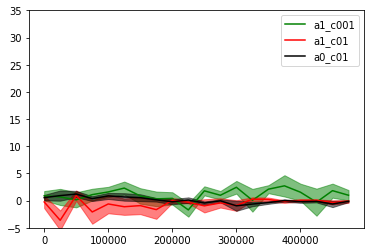

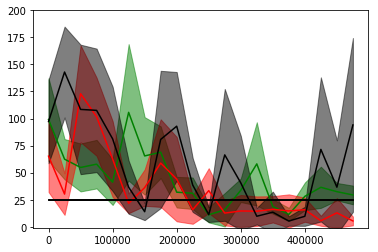

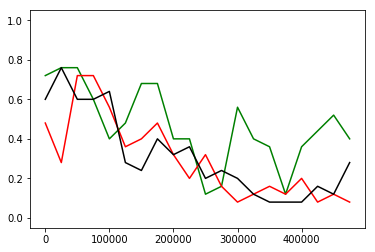

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [59]:
plot("td3_ss10k_m001_a1_c001_pointgoal2")
plot("ppo_m001_a1_c001_pointgoal2","blue")
plot("sac_c_ss10k_m001_a1_c001_pointgoal2","green")

plt.figure(1)
plt.legend(["td3","ppo","sac"])
plt.show()
plt.figure(2)
plt.show()
plt.figure(3)
plt.show()

plot("sac_c_ss10k_m1_a2_pointgoal2")
plot("sac_c_ss10k_m1_a5_pointgoal2","blue")
plot("sac_c_ss10k_m1_a10_pointgoal2","green")

plt.figure(1)
plt.legend(["penalty 2","penalty 5","penalty 10"])
plt.show()
plt.figure(2)
plt.show()
plt.figure(3)
plt.show()


plot("sac_c_ss10k_m001_a1_c001_pointgoal2")
plot("sac_c_ss10k_m001_a1_c001_buckets_pointgoal2","blue")
plot("sac_c_ss10k_m001_a1_c001_buckets_first_layer_512_pointgoal2","green")

plt.figure(1)
plt.legend(["sac","buckets","buckets_large_layer"])
plt.show()
plt.figure(2)
plt.show()
plt.figure(3)
plt.show()

plot("sac_c_ss10k_m001_a1_pointgoal2",epochs=20)
plot("sac_c_ss10k_m001_a10_pointgoal2","blue",epochs=20)
plot("sac_c_ss10k_m001_a1_c001_pointgoal2","green",epochs=20)


plt.figure(1)
plt.legend(["a1","a10","a1_c001"])
plt.show()
plt.figure(2)
plt.show()
plt.figure(3)
plt.show()

plot("sac_c_ss10k_m001_a1_c001_pointgoal2","green",epochs=20)
plot("sac_c_ss10k_m001_a1_c01_pointgoal2","red",epochs=20)
plot("sac_c_ss10k_m001_a0_c01_pointgoal2","black",epochs=20)

plt.figure(1)
plt.legend(["a1_c001","a1_c01","a0_c01"])
plt.show()
plt.figure(2)
plt.show()
plt.figure(3)
plt.show()

3.51655138426751
62.2
-6.994938314000806
117.32
0.16761499209019817
8.88


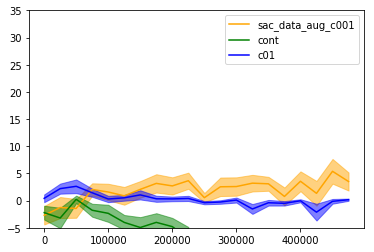

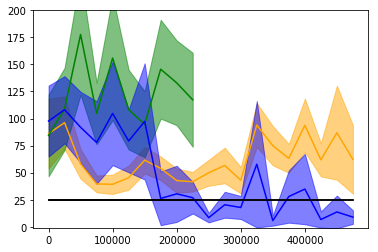

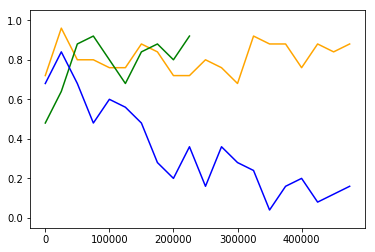

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

-6.062055580821732
51.08
0.15511446202075874
81.56
-0.22112932461473
0.68


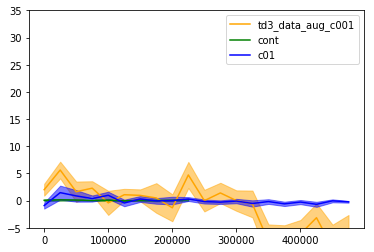

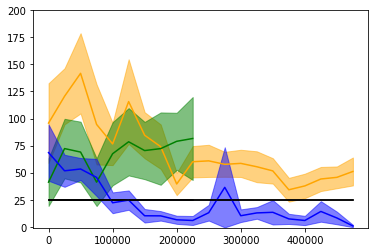

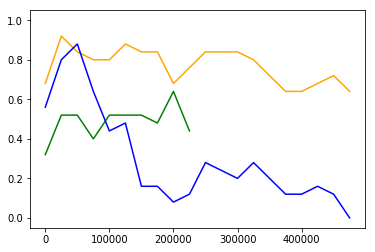

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [60]:
plot("sac_c_ss10k_m001_a1_c001_long_data_aug_pointgoal2",epochs=20)
plot("sac_c_ss10k_m001_a1_c001_data_aug_cont_pointgoal2","green",epochs=10)
plot("sac_c_ss10k_m001_a1_c01_long_data_aug_pointgoal2","blue",epochs=20)


plt.figure(1)
plt.legend(["sac_data_aug_c001","cont","c01"])
plt.show()
plt.figure(2)
plt.show()
plt.figure(3)
plt.show()


plot("td3_ss10k_m001_a1_c001_long_data_aug_pointgoal2",epochs=20)
plot("td3_ss10k_m001_a1_c001_data_aug_cont_pointgoal2","green",epochs=10)
plot("td3_ss10k_m001_a1_c01_long_data_aug_pointgoal2","blue",epochs=20)


plt.figure(1)
plt.legend(["td3_data_aug_c001","cont","c01"])
plt.show()
plt.figure(2)
plt.show()
plt.figure(3)
plt.show()

12.064407369757477
37.76


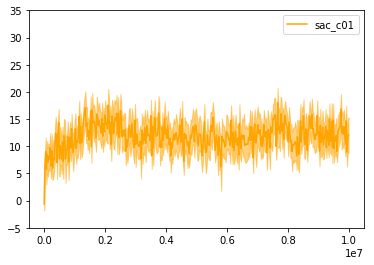

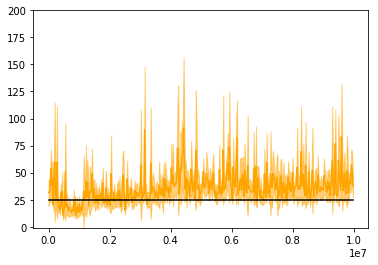

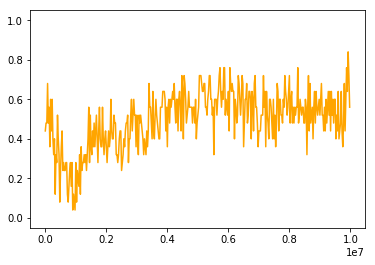

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [61]:
plot("sac_c_ss10k_m001_a1_c001_10M",epochs=400)
plt.figure(1)
plt.legend(["sac_c01"])
plt.show()
plt.figure(2)
plt.show()
plt.figure(3)
plt.show()

In [31]:
print()